题目一、以鸢尾花数据集为例学习 SVM
加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42
创建并训练 SVM 模型，使用线性核函数，随机种子42（也可以自己调试、体验不同参数的作用，选择更好的值，注释明确即可）
使用 Accuracy、Recall、F1 Score、Confusion Matri 这四个评估指标来评估实验效果

二分类

In [25]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y != 2]
y = y[y != 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[12  0]
 [ 0  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



多分类

In [29]:
import numpy as np
import pandas as pd  
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear', random_state=42, decision_function_shape='ovr') 
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted') 
f1 = f1_score(y_test, y_pred, average='weighted') 
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



由于鸢尾花数据集的本身特点，直接使用多分类SVM模型更直接，并且评估指标能够直接反映模型在所有类别上的表现。

题目二、以新闻数据分类为例 学习朴素贝叶斯
导入库与数据集，数据集的导入方式：from sklearn.datasets import fetch_20newsgroups
查看类别标签、数据集的描述、数据样本
将文本数据转换为词袋模型
将数据集分为训练集和测试集，训练集比例0.2，随机种子42
创建并训练朴素贝叶斯分类器
使用 Accuracy、Recall、F1 Score 这三个评估指标来评估实验效果
横坐标为 Predicted，纵坐标为 Actual，画出混淆矩阵Confusion Matrix

Category labels: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

Dataset description:
 .. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors s

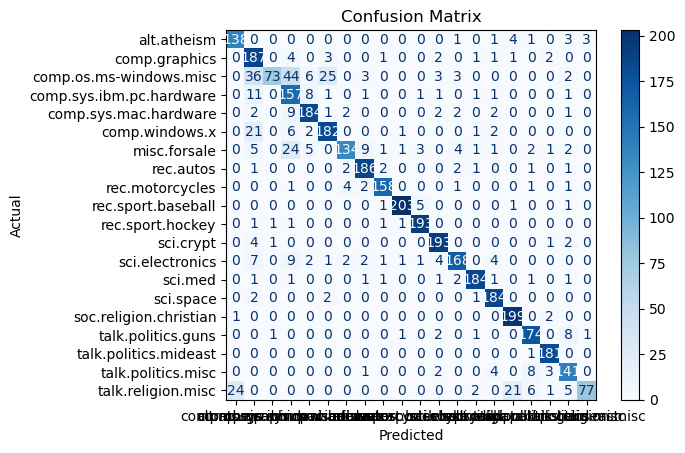

In [39]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
newsgroups = fetch_20newsgroups(subset='all')
print("Category labels:", newsgroups.target_names)
print("\nDataset description:\n", newsgroups.DESCR)
print("\nData samples (first 2):\n", newsgroups.data[:2])
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')  
f1 = f1_score(y_test, y_pred, average='weighted')  
print("\nAccuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=newsgroups.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

题目三、以鸢尾花数据集为例 学习k-means聚类
导入数据集和聚类库
使用k-means聚类，将数据分为3个簇，设置随机种子为0
PCA 降维到2维空间后，输出可视化结果
尝试先降维，再聚类，再输出可视化结果，比较两次的不同
使用轮廓系数比较聚类效果
绘制轮廓系数与聚类数的关系图

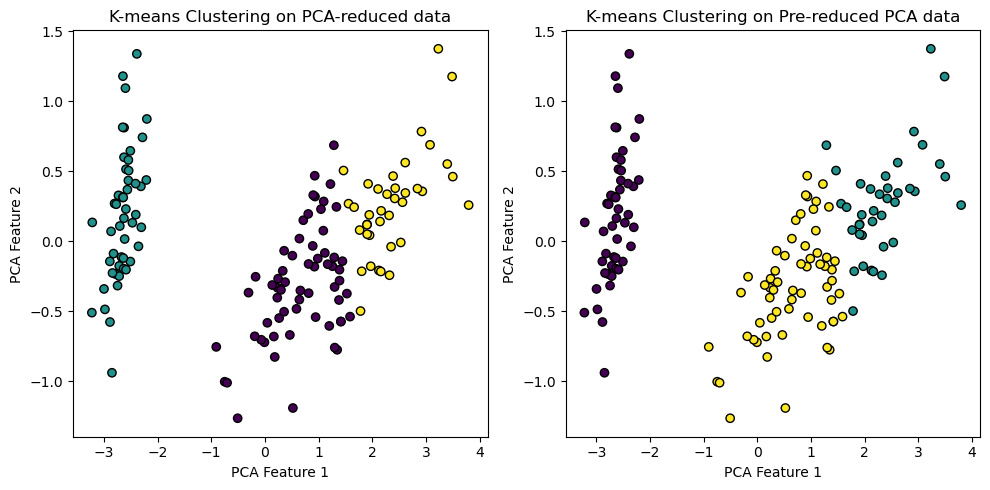

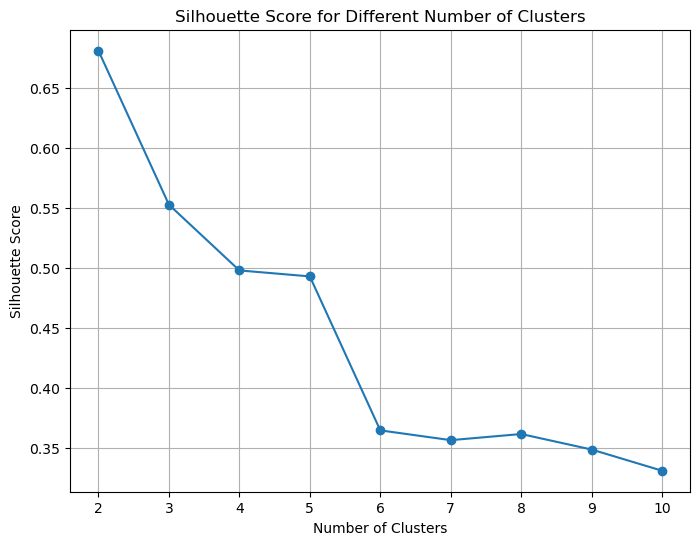

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
os.environ['OMP_NUM_THREADS'] = '1'
iris = load_iris()
X = iris.data
y = iris.target
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-means Clustering on PCA-reduced data')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
X_pca_reduced = pca.fit_transform(X)
kmeans_pca = KMeans(n_clusters=3, random_state=0)
labels_pca = kmeans_pca.fit_predict(X_pca_reduced)
plt.subplot(1, 2, 2)
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=labels_pca, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-means Clustering on Pre-reduced PCA data')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.tight_layout()
plt.show()
def plot_silhouette_scores(X, max_clusters):
    sil_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        cluster_labels = kmeans.fit_predict(X)
        sil_score = silhouette_score(X, cluster_labels)
        sil_scores.append(sil_score)
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_clusters + 1), sil_scores, marker='o')
    plt.title('Silhouette Score for Different Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()
plot_silhouette_scores(X, max_clusters=10)

一：先对数据进行了k-means聚类，然后再使用PCA将数据降维到2维以进行可视化。可视化结果可能无法完全反映原始高维数据中的聚类结构。由于是在原始高维数据上进行的，轮廓系数可能较高，因为高维数据可能包含更多有助于聚类的信息。
二：先使用PCA将数据降维到2维，然后再进行k-means聚类，可以在减少数据的维度并可能提高聚类的效率或效果，可视化结果更直接地反映了聚类算法在降维后数据上的表现。可能会丢失一些有助于聚类的信息，导致轮廓系数降低。